<a href="https://colab.research.google.com/github/nour-said/Breast_cancer_prediction/blob/main/Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

url = "/content/drive/MyDrive/Breast_Cancer.csv"
df = pd.read_csv(url)
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
df.shape

(4024, 16)

In [ ]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

<Axes: xlabel='A Stage', ylabel='count'>

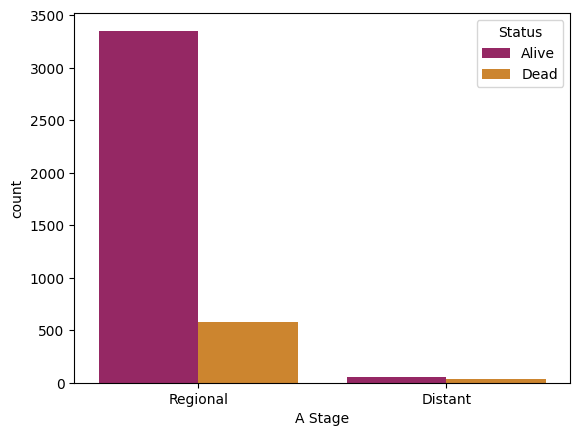

In [ ]:
sns.countplot(x='A Stage', data=df, hue='Status', palette=["#A71666", "#E68815"])


<Axes: xlabel='Grade', ylabel='count'>

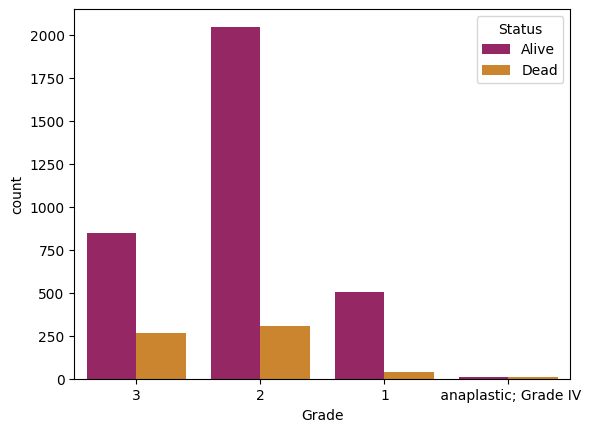

In [ ]:
sns.countplot(x='Grade', data=df, hue='Status', palette=["#A71666", "#E68815"])


In [ ]:
df = df[df.columns].replace({'White' : 1, 'Black' : 2, 'Other' :0, 'Single ':0,'Married':1,'Divorced':2,'Widowed':3,'Separated':4,
                             'Poorly differentiated':1, 'Moderately differentiated':2,
                             'Well differentiated':3, 'Undifferentiated':4, ' anaplastic; Grade IV' : 4,
                             '3':3, '2':2, '1':1, 'Regional':1,'Distant':2, 'Positive':1,'Negative':2,
                             'Alive':1,'Dead':0, 'T1':1,'T2':2,'T3':3,'T4':4, 'N1':1,'N2':2,'N3':3,'IIA':1, 'IIIA':2, 'IIIC':3, 'IIB':4, 'IIIB':5})

df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,1,1,1,1,1,1,3,1,4,1,1,24,1,60,1
1,50,1,1,2,2,2,2,2,1,35,1,1,14,5,62,1
2,58,1,2,3,3,3,2,2,1,63,1,1,14,7,75,1
3,58,1,1,1,1,1,1,3,1,18,1,1,2,1,84,1
4,47,1,1,2,1,4,1,3,1,41,1,1,3,1,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,0,1,1,1,1,2,2,1,9,1,1,1,1,49,1
4020,56,1,2,2,2,2,2,2,1,46,1,1,14,8,69,1
4021,68,1,1,2,1,4,2,2,1,22,1,2,11,3,69,1
4022,58,2,2,2,1,4,2,2,1,44,1,1,11,1,72,1


In [ ]:
X =df.drop(columns = 'Status')
y =df['Status']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X)

# transform training data
X_norm = norm.transform(X)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=8)

fit = test.fit(X_norm, y)
np.set_printoptions(precision=6)
print(fit.scores_)

features = fit.transform(X_norm)

print(features[0:5,:])


[  1.081067   1.906446   1.350214  23.965021 144.361825   9.376809
  11.473223  12.3669    36.67971    7.888868 128.029563 104.293642
   0.398181  48.673055  64.407528]
[[0.       0.       0.666667 0.       0.       0.       0.       0.556604]
 [0.333333 0.5      0.333333 0.       0.       0.       0.088889 0.575472]
 [0.666667 1.       0.333333 0.       0.       0.       0.133333 0.698113]
 [0.       0.       0.666667 0.       0.       0.       0.       0.783019]
 [0.333333 0.       0.666667 0.       0.       0.       0.       0.462264]]


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# print(X)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,y,test_size=0.25,random_state=6)

lr = LogisticRegression(max_iter = 80000000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=80000000)

In [ ]:
predictions = lr.predict(X_train)
percentage = lr.score(X_train,y_train)

res=confusion_matrix(y_train,predictions)
print("confusion matrix")
print(res)

print(f"Accuracy={percentage*100}%")

confusion matrix
[[ 198  268]
 [  53 2499]]
Accuracy=89.3638170974155%


In [ ]:
predictions = lr.predict(X_test)
percentage = lr.score(X_test,y_test)

res=confusion_matrix(y_test,predictions)
print("confusion matrix")
print(res)

print(f"Accuracy={percentage*100}%")

confusion matrix
[[ 64  86]
 [ 14 842]]
Accuracy=90.05964214711729%
